In [19]:
#import dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import stats

In [20]:
#read in netflix dataset
netflix_origs = pd.read_csv("NetflixOriginals.csv", encoding = "cp437")
netflix_origs

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [21]:
#subset netflix dataset
netflix_origs = netflix_origs[["Title", "IMDB Score", "Language"]]

In [22]:
#count movies 1 time for each language they are available in
lst = []
for i in range(len(netflix_origs)):
    language = str(netflix_origs.loc[i]["Language"])
    if ("/" in language):
        split = language.split("/")
        for j in range(len(split)):
            row = netflix_origs.loc[i].copy()
            row["Language"] = split[j]
            lst.append(row)
    else:
        row = netflix_origs.loc[i].copy()
        lst.append(row)
netflix_origs_split = pd.DataFrame(lst)
netflix_origs_split

,Language,IMDB Score
0,Ukranian,8.40
1,Russian,7.85
2,Akan,7.70
3,Arabic,7.30
4,Khmer,7.20


In [27]:
language = netflix_origs_split.groupby("Language")

language.mean()
languagemean = pd.DataFrame(language.mean()).sort_values(["IMDB Score"], ascending = False)
languagemean

#sort by most popular languages used in netflix 
languagesorted = netflix_origs_split.sort_values(["IMDB Score"], ascending = False)
langsortedhead = languagesorted.head()
language.count()

,Title,IMDB Score
Language,,
Akan,1,1
Arabic,1,1
Basque,1,1
Bengali,1,1
Catalan,1,1
Dutch,3,3
English,422,422
Filipino,2,2
French,21,21


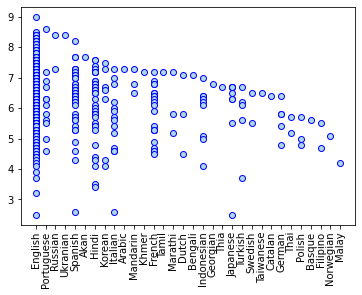

In [31]:
plt.scatter(languagesorted["Language"], languagesorted["IMDB Score"], color='lightblue', edgecolor='blue')
plt.xticks(rotation = 90)
#save fig
plt.savefig("language_popularity.png")

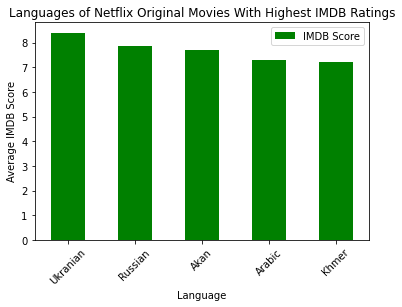

In [32]:
#find means of movie ratings according to language
language.mean()
languagemean = pd.DataFrame(language.mean()).sort_values(["IMDB Score"], ascending = False)
languagemean
#save languagemean as the means of the top 5 rated movie languages
languagemean = languagemean.head()
#plot means of movie ratings according to language (only top 5)
ax2 = languagemean.plot.bar(rot=45, color='g')
plt.xlabel("Language")
plt.ylabel("Average IMDB Score")
plt.title("Languages of Netflix Original Movies With Highest IMDB Ratings")
plt.savefig("top5languagemeans.png")

In [34]:
#only keep language & IMDB score
popular_language = netflix_origs_split[["Language", "IMDB Score"]]
#sort by language & count languages 
languages = popular_language.sort_values(by = "Language" )["Language"].unique()
#add extra column to assign numeric index to most popular languages
popular_language["Language_num"]=""
popular_language

,Language,IMDB Score,Language_num
0,English,2.5,
0,Japanese,2.5,
1,Spanish,2.6,
2,Italian,2.6,
3,English,3.2,
...,...,...,...
580,Ukranian,8.4,
580,Russian,8.4,
581,English,8.5,
582,Portuguese,8.6,


In [39]:
#assign numeric values to top 5 most popular languages
popular_language.loc[popular_language['Language'] == "English", 'Language_num'] = 1
popular_language.loc[popular_language['Language'] == "Spanish", 'Language_num'] = 2
popular_language.loc[popular_language['Language'] == "Hindi", 'Language_num'] = 3
popular_language.loc[popular_language['Language'] == "Italian", 'Language_num'] = 4
popular_language.loc[popular_language['Language'] == "Portuguese", 'Language_num'] = 5

#assign 0s to other languages & remove them 
popular_language.replace('', 0, inplace = True)
popular_language = popular_language.loc[popular_language["Language_num"] != 0]
popular_language

,Language,IMDB Score,Language_num
0,English,2.5,1
1,Spanish,2.6,2
2,Italian,2.6,4
3,English,3.2,1
4,Hindi,3.4,3
...,...,...,...
579,English,8.4,1
580,English,8.4,1
581,English,8.5,1
582,Portuguese,8.6,5


In [37]:
#run ANOVA test
stats.f_oneway(popular_language['Language_num'], popular_language['IMDB Score'])

F_onewayResult(statistic=7319.980613606987, pvalue=0.0)